# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание - 11.
Балл, который ставится в ведомость - min(10,ваш балл).

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

#A

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
df = pd.read_csv("telecom_churn.csv")

In [ ]:
df['Voice mail plan'] = df['Voice mail plan'] == 'Yes'
df['International plan'] = df['International plan'] == 'Yes'

df['Voice mail plan'] = df['Voice mail plan'].replace({True: 1, False: 0})
df['International plan'] = df['International plan'].replace({True: 1, False: 0})

state = pd.get_dummies(df['State'])
df = state.join(df).drop("State", axis = 1)


In [ ]:
df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,0,0,0,0,0,0,0,0,0,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0,0,0,0,0,0,0,0,0,0,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,0,0,0,0,0,0,0,0,0,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,0,0,0,0,0,0,0,0,0,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,0,0,0,0,0,0,0,0,0,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
X, y = np.array(df.drop(["Churn"] , axis=1)), np.array([int(i) for i in list(df["Churn"])]).reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
pipe = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(max_iter=10000),
                                 param_grid=param_grid,
                                 scoring='f1',
                                 cv=5))

pipe.fit(X_train, y_train[:,0])

pipe.score(X_train, y_train)

0.3975409836065574

In [ ]:
pipe.score(X_test, y_test)

0.33816425120772947

In [ ]:
print("train:", classification_report(y_train, pipe.predict(X_train)), "\ntest:", classification_report(y_test, pipe.predict(X_test)))

train:               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1993
           1       0.66      0.29      0.40       340

    accuracy                           0.87      2333
   macro avg       0.77      0.63      0.66      2333
weighted avg       0.85      0.87      0.85      2333
 
test:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.55      0.24      0.34       143

    accuracy                           0.86      1000
   macro avg       0.72      0.61      0.63      1000
weighted avg       0.84      0.86      0.84      1000



Качество модели не очень, но для f1 сойдет, переобучение очень небольшое

In [ ]:
from sklearn.metrics import accuracy_score as a, roc_auc_score as ra

In [ ]:
print("F1-score:", "\ntrain:", f1_score(y_train, pipe.predict(X_train)), "\ntest:", f1_score(y_test, pipe.predict(X_test)))
print("\n\nROC-AUC:", "\ntrain:", ra(y_train, pipe.predict(X_train)), "\ntest:", ra(y_test, pipe.predict(X_test)))

F1-score: 
train: 0.3975409836065574 
test: 0.33816425120772947


ROC-AUC: 
train: 0.6298522770874531 
test: 0.6054581357965255


#B

In [ ]:
param_grid = {'C': [1, 0.1, 0.001, 0.0001],
              'gamma': [10, 1, 0.01, 0.01, 0.0001],
              'kernel': ['rbf', 'linear']} 

grid = make_pipeline(StandardScaler(), 
                    GridSearchCV(SVC(class_weight = "balanced"),
                                 param_grid=param_grid,
                                 scoring='f1',
                                 cv=5))
  

grid.fit(X_train, y_train[:,0])

print(grid.score(X_train, y_train))





0.6950517836593786


In [ ]:
grid.score(X_test, y_test)

0.5567567567567568

In [ ]:
print("F1-score:", "\ntrain:", f1_score(y_train, grid.predict(X_train)), "\ntest:", f1_score(y_test, grid.predict(X_test)))
print("\n\nROC-AUC:", "\ntrain:", ra(y_train, grid.predict(X_train)), "\ntest:", ra(y_test, grid.predict(X_test)))

F1-score: 
train: 0.6950517836593786 
test: 0.5567567567567568


ROC-AUC: 
train: 0.8871683244296213 
test: 0.7877944692413771


Переобучение заметное, но качество модели приличнее, чем у регрессии

#D


удалим не самые нужные признаки

In [ ]:
s = {"Churn": {False: 0, True: 1}, "International plan": {"No": 0, "Yes": 1}, "Voice mail plan": {"No": 0, "Yes": 1}}

tab = pd.read_csv("telecom_churn.csv")
tab = tab.replace(s)
corr = tab.corr()
corr.style.background_gradient(cmap='coolwarm')

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


In [ ]:
newtc = tab.drop("Total day charge", axis = 1).drop("Total night charge", axis = 1).drop("Total intl charge", axis = 1).drop("Total eve charge", axis = 1).drop("Voice mail plan", axis = 1)

In [ ]:
corr = newtc.corr()
corr.style.background_gradient(cmap='coolwarm')

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,-0.004628,0.006216,0.038470,-0.006757,0.019260,-0.008955,-0.013176,0.009514,0.020661,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.001994,-0.008264,-0.009646,0.003580,-0.011886,-0.005825,0.016522,-0.018288,-0.024179,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.008745,0.049396,0.003755,0.019100,0.006114,-0.028905,0.012451,0.045871,0.017366,-0.024522,0.259852
Number vmail messages,-0.004628,-0.001994,0.008745,1.000000,0.000778,-0.009548,0.017562,-0.005864,0.007681,0.007123,0.002856,0.013957,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,0.000778,1.000000,0.006750,0.007043,0.015769,0.004323,0.022972,-0.010155,0.008033,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.009548,0.006750,1.000000,-0.021451,0.006462,0.022938,-0.019557,0.021565,0.004574,-0.018942,0.018459
Total eve minutes,-0.006757,0.003580,0.019100,0.017562,0.007043,-0.021451,1.000000,-0.011430,-0.012584,0.007586,-0.011035,0.002541,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.005864,0.015769,0.006462,-0.011430,1.000000,-0.002093,0.007710,0.008703,0.017434,0.002423,0.009233
Total night minutes,-0.008955,-0.005825,-0.028905,0.007681,0.004323,0.022938,-0.012584,-0.002093,1.000000,0.011204,-0.015207,-0.012353,-0.009288,0.035493
Total night calls,-0.013176,0.016522,0.012451,0.007123,0.022972,-0.019557,0.007586,0.007710,0.011204,1.000000,-0.013605,0.000305,-0.012802,0.006141


#C

In [ ]:
newtc = newtc.drop("Area code", axis = 1).drop("Account length", axis = 1)

In [ ]:
newtc['International plan'] = newtc['International plan'] == 'Yes'
newtc['International plan'] = newtc['International plan'].replace({True: 1, False: 0})


X_new, y_new = np.array(df.drop(["Churn"] , axis=1)), np.array([int(i) for i in list(df["Churn"])]).reshape(-1, 1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

pipeln = make_pipeline(PolynomialFeatures(3),
                     StandardScaler(),
                     GridSearchCV(LogisticRegression(),
                                  param_grid={"C": [0.01, 0.1, 1, 10, 100]},
                                  scoring='f1',
                                  cv=5))

pipeln.fit(Xtrain, ytrain)
pipeln.score(Xtrain, ytrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

1.0

In [ ]:
pipeln.score(Xtest, ytest)

0.4413793103448276

In [ ]:
print("F1-score:", "\ntrain:", f1_score(ytrain, pipeln.predict(Xtrain)), "\ntest:", f1_score(ytest, pipeln.predict(Xtest)))
print("\n\nROC-AUC:", "\ntrain:", ra(ytrain, pipeln.predict(Xtrain)), "\ntest:", ra(ytest, pipeln.predict(Xtest)))

F1-score: 
train: 1.0 
test: 0.4413793103448276


ROC-AUC: 
train: 1.0 
test: 0.6753514863199811


Добавление полиномиальных признаков значительно повысило качество, несмотря на cильное переобучение

#E

а) Вывод:логистическая регрессия плохо решает задачу, SVC с линейным ядром спраляется приличнее. Интересная история происходит при добавлении полиномиальных признаков степени 3: модель переобучается, качество на трейне взлетает, но на тесте оно примерно примерно такое же (чуть лучше относительно f1-score и средне хуже относительно ROC-AUC), как и при работе SVC.

Логистическая регрессия:

F1-score: 
train: 0.3975409836065574 
test: 0.33816425120772947

ROC-AUC: 
train: 0.6298522770874531 
test: 0.6054581357965255

SVC:

F1-score: 
train: 0.6950517836593786 
test: 0.5567567567567568

ROC-AUC: 
train: 0.8871683244296213 
test: 0.7877944692413771


polynomial(3):

F1-score: 
train: 1.0 
test: 0.4413793103448276

ROC-AUC: 
train: 1.0 
test: 0.6753514863199811

b)были добавлены полиномиальные признаки степени 3, удалены 1) слабокоррелирующие с целевой переменной признаки Area code и Account length, Total day calls, Total eve calls и Total night calls 2) сильнокррелирующие с другим признаком Total day charge, Total night charge, Total intl charge, Total eve charge, Voice mail plan.

c)Да, переобучение очень небольшое при прирменении SCV: качество модели представлено выше

## Часть 2. Оценка качества моделей классификации (6 баллов).

**Задание 0 (1 балл)**. Закончите определения, начинающиеся так:


    accuracy - это доля правильных ответов, сделанных моделью. То есть количество предсказаний, где предсказанный класс совпал с истинным.

    точность (precision) - это доля правильных ответов в пределах класса. То есть доля объектов истинно принадлежащих данному классу относительно всех объектов которые модель отнесла к этому классу. (TP/(TP+FP))

    полнота (recall) - это доля объектов, реально относящихся к положительному классу, которые были предсказаны верно (TP/(TP+FN))

    TPR - это же самое, что и recall - доля верно принятых объектов положительного класса. (TRUE POSITIVE RATE)

    
    
Продолжите определения прямо в этой ячейке.

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [ ]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [ ]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [ ]:
print("target:", df["target"].value_counts())
print("1:", df["pred1_classes"].value_counts())
print("2:", df["pred2_classes"].value_counts())
print("3:", df["pred3_classes"].value_counts())

target: 0    382
1    307
Name: target, dtype: int64
1: 0    495
1    194
Name: pred1_classes, dtype: int64
2: 1    367
0    322
Name: pred2_classes, dtype: int64
3: 0    534
1    155
Name: pred3_classes, dtype: int64


сбалансированность по классам есть только в pred1_classes

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [ ]:
from sklearn.metrics import accuracy_score as acc

print("1. Accuracy:", acc(df["pred1_classes"], df["target"]))
print("2. Accuracy:", acc(df["pred2_classes"], df["target"]))
print("3. Accuracy:", acc(df["pred3_classes"], df["target"]))

1. Accuracy: 0.6618287373004355
2. Accuracy: 0.6719883889695211
3. Accuracy: 0.6400580551523948


самый точный с точки зрения accuracy алгоритм - второй, хотя по качеству, все 3 алгоритма далеки от точности

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [ ]:
from sklearn.metrics import precision_score as pr, recall_score as rc

print("1. Precision:", pr(df["target"], df["pred1_classes"]))
print("1. Recall:", rc(df["target"], df["pred1_classes"]))
print("2. Precision:", pr(df["target"], df["pred2_classes"]))
print("2. Recall:", rc(df["target"], df["pred2_classes"]))
print("3. Precision:", pr(df["target"], df["pred3_classes"]))
print("3. Recall:", rc(df["target"], df["pred3_classes"]))

1. Precision: 0.6907216494845361
1. Recall: 0.4364820846905538
2. Precision: 0.6103542234332425
2. Recall: 0.7296416938110749
3. Precision: 0.6903225806451613
3. Recall: 0.3485342019543974


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

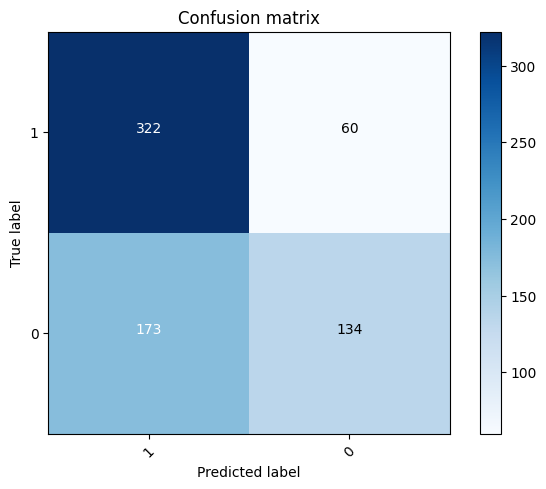

In [ ]:
matrix_1 = confusion_matrix(df["target"], df["pred1_classes"])
matrix_2 = confusion_matrix(df["target"], df["pred2_classes"])
matrix_3 = confusion_matrix(df["target"], df["pred3_classes"])

plot_confusion_matrix(matrix_1, df["pred1_classes"].unique())

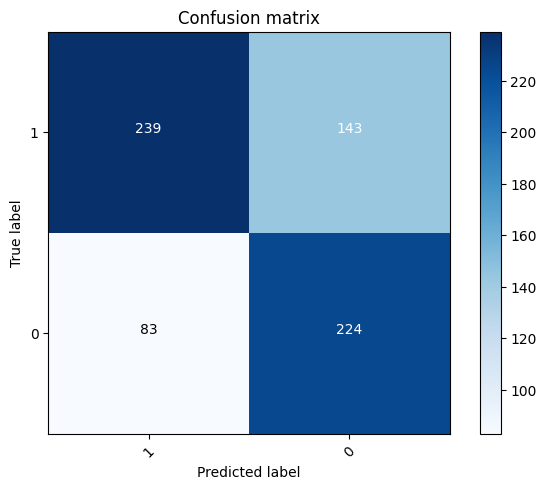

In [ ]:
plot_confusion_matrix(matrix_2, df["pred2_classes"].unique())

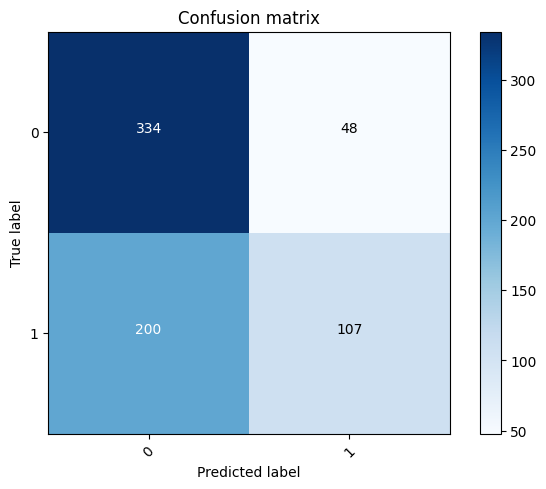

In [ ]:
plot_confusion_matrix(matrix_3, df["pred3_classes"].unique())

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [ ]:
import builtins
range = builtins.range

In [ ]:
lim1 = 0
maxr = 0
for i in range(101):
  classes1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes1)
  r = rc(df["target"], classes1)

  if a >= 0.65 and r > maxr:
    maxr = r
    lim1 = i
print("алгоритм 1: максимальное значение полноты:", maxr, "при пороге:", lim1/100)


алгоритм 1: максимальное значение полноты: 0.742671009771987 при пороге: 0.36


0.742671009771987


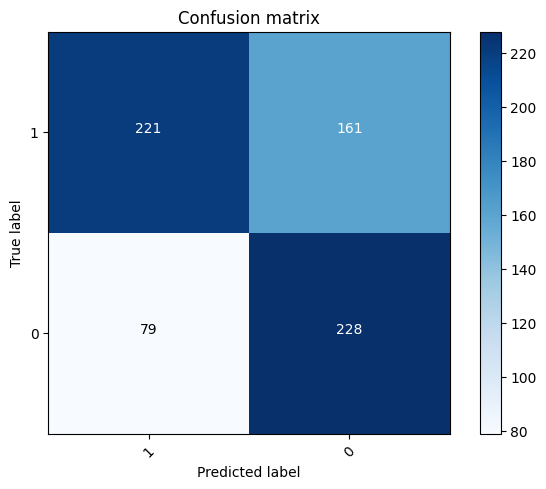

In [ ]:
classesl1 = df["pred1_probs"].map(lambda x: 1 if x>lim1/100 else 0)
matrix_l1 = confusion_matrix(df["target"], classesl1)

plot_confusion_matrix(matrix_l1, classesl1.unique())
print(rc(df["target"], classesl1))

In [ ]:
lim2 = 0
maxr = 0
for i in range(101):
  classes2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes2)
  r = rc(df["target"], classes2)

  if a >= 0.65 and r > maxr:
    maxr = r
    lim2 = i
print("алгоритм 2: максимальное значение полноты:", maxr, "при пороге:", lim2/100)

алгоритм 2: максимальное значение полноты: 0.8371335504885994 при пороге: 0.27


0.8371335504885994


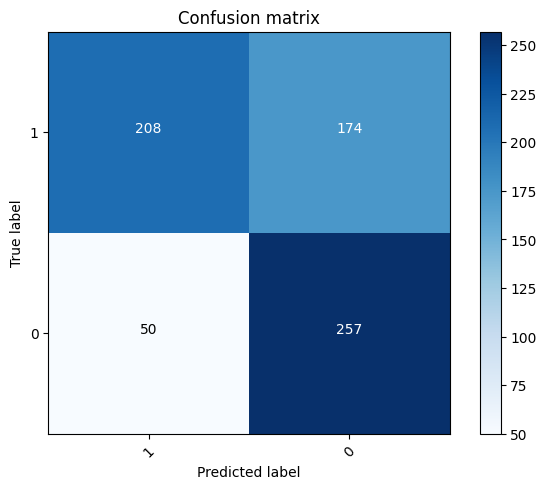

In [ ]:
classesl2 = df["pred2_probs"].map(lambda x: 1 if x>lim2/100 else 0)
matrix_l2 = confusion_matrix(df["target"], classesl2)

plot_confusion_matrix(matrix_l2, classesl2.unique())
print(rc(df["target"], classesl2))

In [ ]:
lim3 = 0
maxr = 0
for i in range(101):
  classes3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classes3)
  r = rc(df["target"], classes3)

  if a >= 0.65 and r > maxr:
    maxr = r
    lim3 = i
print("алгоритм 3: максимальное значение полноты:", maxr, "при пороге:", lim3/100)

алгоритм 3: максимальное значение полноты: 0 при пороге: 0.0


алгоритм 3 не справился с задачей

Итог: с вариантом 1 лучше всего справился 2 алгоритм, у него наиболее высокое значение полноты

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [ ]:
limit1 = 0
maxr = 0
for i in range(101):
  classeso1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso1)
  r = pr(df["target"], classeso1)

  if a >= 0.65 and r > maxr:
    maxr = r
    limit1 = i
print("алгоритм 1: максимальное значение точности:", maxr, "при пороге:", limit1/100)

алгоритм 1: максимальное значение точности: 0.7371794871794872 при пороге: 0.54


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7371794871794872


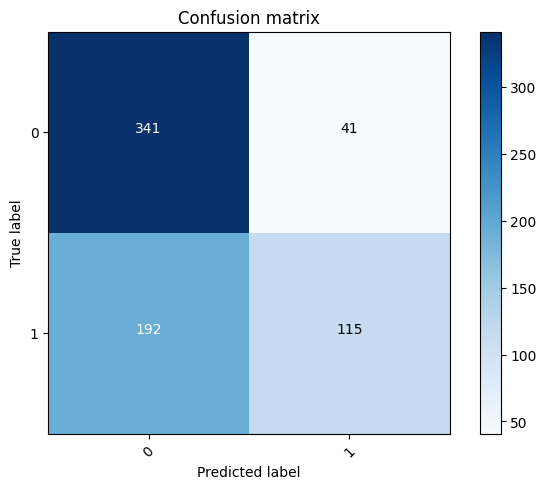

In [ ]:
classeso1 = df["pred1_probs"].map(lambda x: 1 if x>limit1/100 else 0)
matrix_o1 = confusion_matrix(df["target"], classeso1)

plot_confusion_matrix(matrix_o1, classeso1.unique())
print(pr(df["target"], classeso1))

In [ ]:
limit2 = 0
maxr = 0
for i in range(101):
  classeso2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso2)
  r = pr(df["target"], classeso2)

  if a >= 0.65 and r > maxr:
    maxr = r
    limit2 = i
print("алгоритм 2: максимальное значение точности:", maxr, "при пороге:", limit2/100)

алгоритм 2: максимальное значение точности: 0.8367346938775511 при пороге: 0.73


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

0.8367346938775511


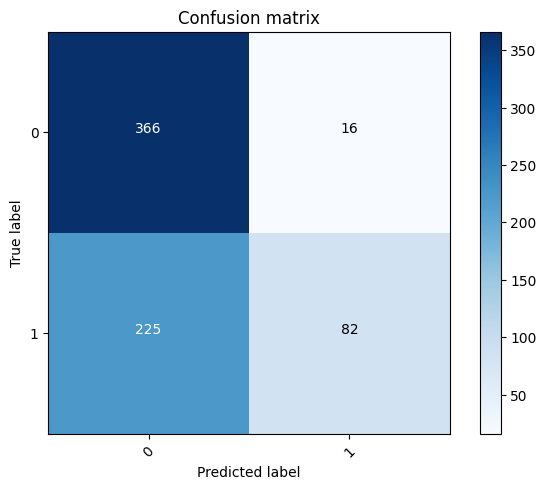

In [ ]:
classeso2 = df["pred2_probs"].map(lambda x: 1 if x>limit2/100 else 0)
matrix_o2 = confusion_matrix(df["target"], classeso2)

plot_confusion_matrix(matrix_o2, classeso2.unique())
print(pr(df["target"], classeso2))

In [ ]:
limit3 = 0
maxr = 0
for i in range(101):
  classeso3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classeso3)
  r = pr(df["target"], classeso3)

  if a >= 0.65 and r > maxr:
    maxr = r
    limit3 = i

print("алгоритм 3: максимальное значение точности:", maxr, "при пороге:", limit3/100)

алгоритм 3: максимальное значение точности: 0 при пороге: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


алгоритм 3 тупой, ни с чем справится не может

Итог: с задачей лучше всего справился алгоритм 2, у него наиболее высокое значение точности

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [ ]:
from sklearn.metrics import f1_score 

In [ ]:
threshold1 = 0
maxr = 0
for i in range(101):
  classesf1 = df["pred1_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf1)
  r = f1_score(df["target"], classesf1)

  if a >= 0.65 and r > maxr:
    maxr = r
    threshold1 = i
print("алгоритм 1: максимальное значение f1:", maxr, "при пороге:", threshold1/100)

1 алгоритм: максимальное значение f1: 0.6551724137931035 при пороге: 0.36


0.6551724137931035


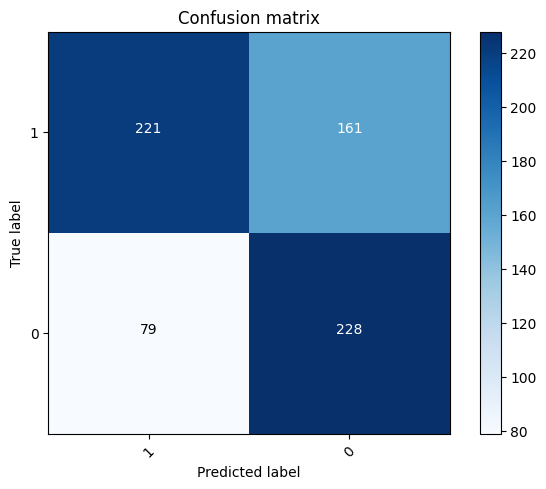

In [ ]:
classesf1 = df["pred1_probs"].map(lambda x: 1 if x>threshold1/100 else 0)
matrix_f1 = confusion_matrix(df["target"], classesf1)

plot_confusion_matrix(matrix_f1, classesf1.unique())
print(f1_score(df["target"], classesf1))

In [ ]:
threshold2 = 0
maxr = 0
for i in range(101):
  classesf2 = df["pred2_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf2)
  r = f1_score(df["target"], classesf2)

  if a >= 0.65 and r > maxr:
    maxr = r
    threshold2 = i
print("алгоритм 2: максимальное значение f1:", maxr, "при пороге:", threshold2/100)

алгоритм 2: максимальное значение f1: 0.6990291262135923 при пороге: 0.32


0.6990291262135923


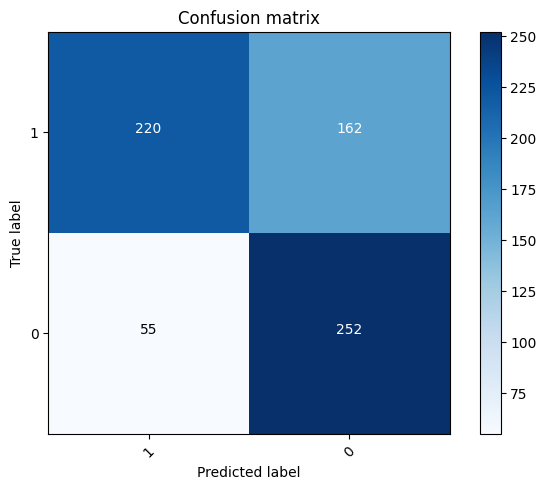

In [ ]:
classesf2 = df["pred2_probs"].map(lambda x: 1 if x>threshold2/100 else 0)
matrix_f2 = confusion_matrix(df["target"], classesf2)

plot_confusion_matrix(matrix_f2, classesf2.unique())
print(f1_score(df["target"], classesf2))

ну с этим дурным как обычно

In [ ]:
threshold3 = 0
maxr = 0
for i in range(101):
  classesf3 = df["pred3_probs"].map(lambda x: 1 if x>i/100 else 0)
  a = acc(df["target"], classesf3)
  r = f1_score(df["target"], classesf3)

  if a >= 0.65 and r > maxr:
    maxr = r
    threshold3 = i
print("алгоритм 3: максимальное значение f1:", maxr, "при пороге:", threshold3/100)

алгоритм 3: максимальное значение f1: 0 при пороге: 0.0


#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [ ]:
df.drop("pred1_probs", axis = 1).drop("pred2_probs", axis = 1).drop("pred3_probs", axis = 1).drop("pred1_classes", axis = 1).drop("pred2_classes", axis = 1).drop("pred3_classes", axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop("target", axis = 1), df["target"], test_size = 0.3, random_state = 42)

In [ ]:
pipe = make_pipeline(StandardScaler(),
                     GridSearchCV(LogisticRegression(),
                                  param_grid={"C": [0.01, 0.1, 1, 10, 100]},
                                  scoring='f1',
                                  cv=5))
pipe.fit(Xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [0.01, 0.1, 1, 10, 100]},
                              scoring='f1'))])

In [ ]:
pred_test = pd.Series(pd.DataFrame(pipe.predict_proba(Xtest))[1])
print(pred_test)

0      0.822268
1      0.820024
2      0.056176
3      0.032732
4      0.908188
         ...   
202    0.834884
203    0.494816
204    0.947543
205    0.056255
206    0.999931
Name: 1, Length: 207, dtype: float64


In [ ]:
pipe.score(Xtrain, ytrain)

0.8634361233480177

In [ ]:
pipe.score(Xtest, ytest)

0.8715083798882681

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

точность

In [ ]:
lm = 0
maxr = 0
for i in range(101):
  classes = pred_test.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = pr(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    lm = i
    
print("максимальное значение точности:", maxr, "при пороге:", lm/100)

максимальное значение точности: 1.0 при пороге: 0.98


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.0


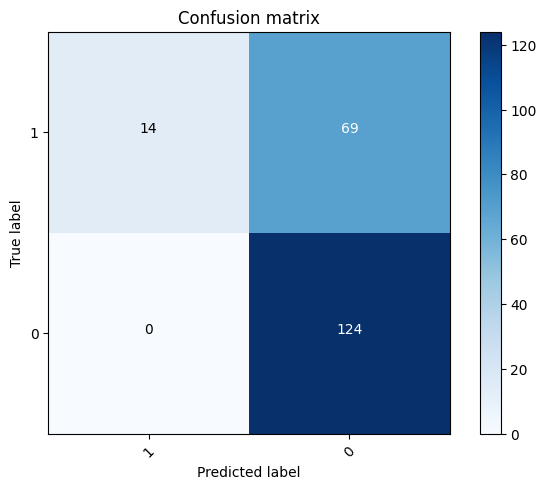

In [ ]:
classes = pred_test.map(lambda x: 1 if x>lm/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix.T[::-1].T[::-1], classes.unique()[::-1])
print(pr(ytest, classes))

полнота

In [ ]:
lm2 = 0
maxr = 0
for i in range(101):
  classes = pred_test.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = rc(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    lm2 = i
    
print("максимальное значение f1:", maxr, "при пороге:", lm2/100)

максимальное значение f1: 1.0 при пороге: 0.06


1.0


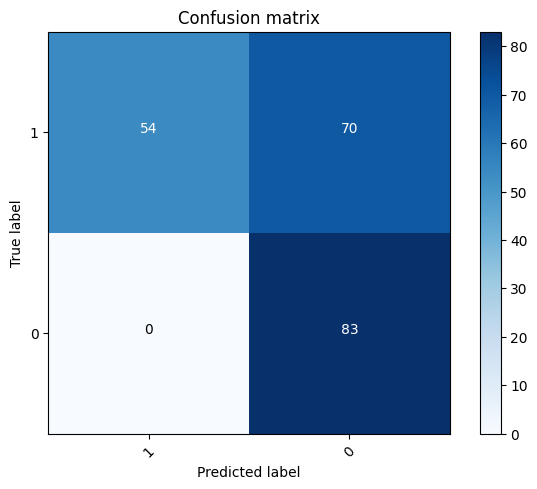

In [ ]:
classes = pred_test.map(lambda x: 1 if x>lm2/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix, classes.unique())
print(rc(ytest, classes))

f1_score

In [ ]:
lm3 = 0
maxr = 0
for i in range(101):
  classes = pred_test.map(lambda x: 1 if x>i/100 else 0)
  a = acc(ytest, classes)
  r = f1_score(ytest, classes)
  if a >= 0.65 and r > maxr:
    maxr = r
    lm3 = i
    
print("максимальное значение f1_score:", maxr, "при пороге:", lm3/100)

максимальное значение f1_score: 0.8823529411764707 при пороге: 0.66


0.8823529411764707


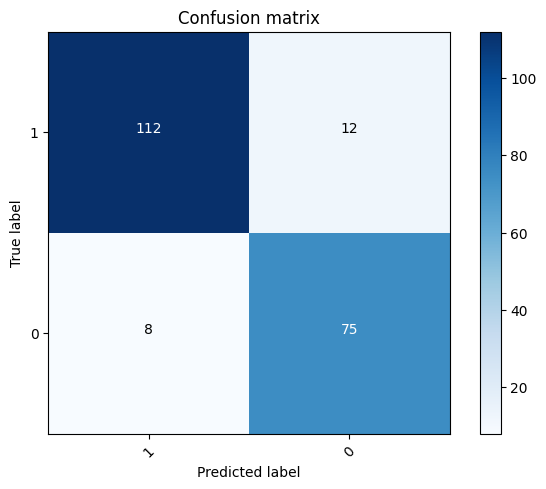

In [ ]:
classes = pred_test.map(lambda x: 1 if x>lm3/100 else 0)
matrix = confusion_matrix(ytest, classes)

plot_confusion_matrix(matrix, classes.unique())
print(f1_score(ytest, classes))

очевидно регрессия с гридом разносит задачу 